# 相关


In [1]:
import pandas as pd
from plotnine import *

## Regression Plot


In [2]:
mpg = pd.read_csv("data/mpg.csv")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


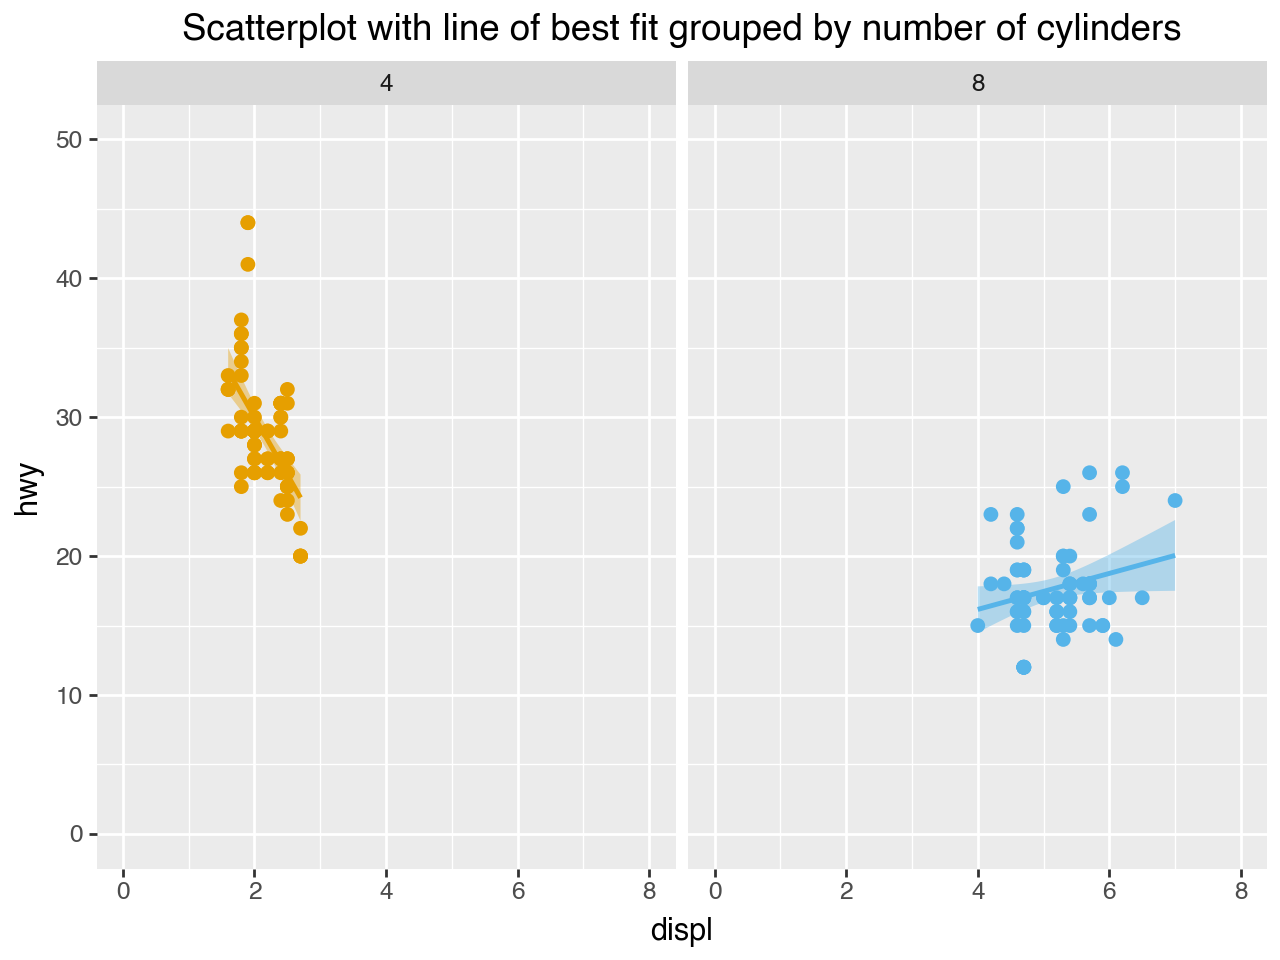

In [3]:
mpg_select = mpg.query("cyl in [4, 8]")

(
    ggplot(mpg_select, aes(x="displ", y="hwy", color="cyl", fill="cyl"))
    + geom_point(size=2)
    + geom_smooth(method="lm", size=1)
    + facet_wrap("cyl")
    + lims(x=(0, 8), y=(0, 50))
    + labs(title="Scatterplot with line of best fit grouped by number of cylinders")
    + theme(plot_title=element_text(hjust=0.5), legend_position="none")
    + scale_color_gradient(low="#E69F00", high="#56B4E9")
    + scale_fill_gradient(low="#E69F00", high="#56B4E9")
)

## Jittering


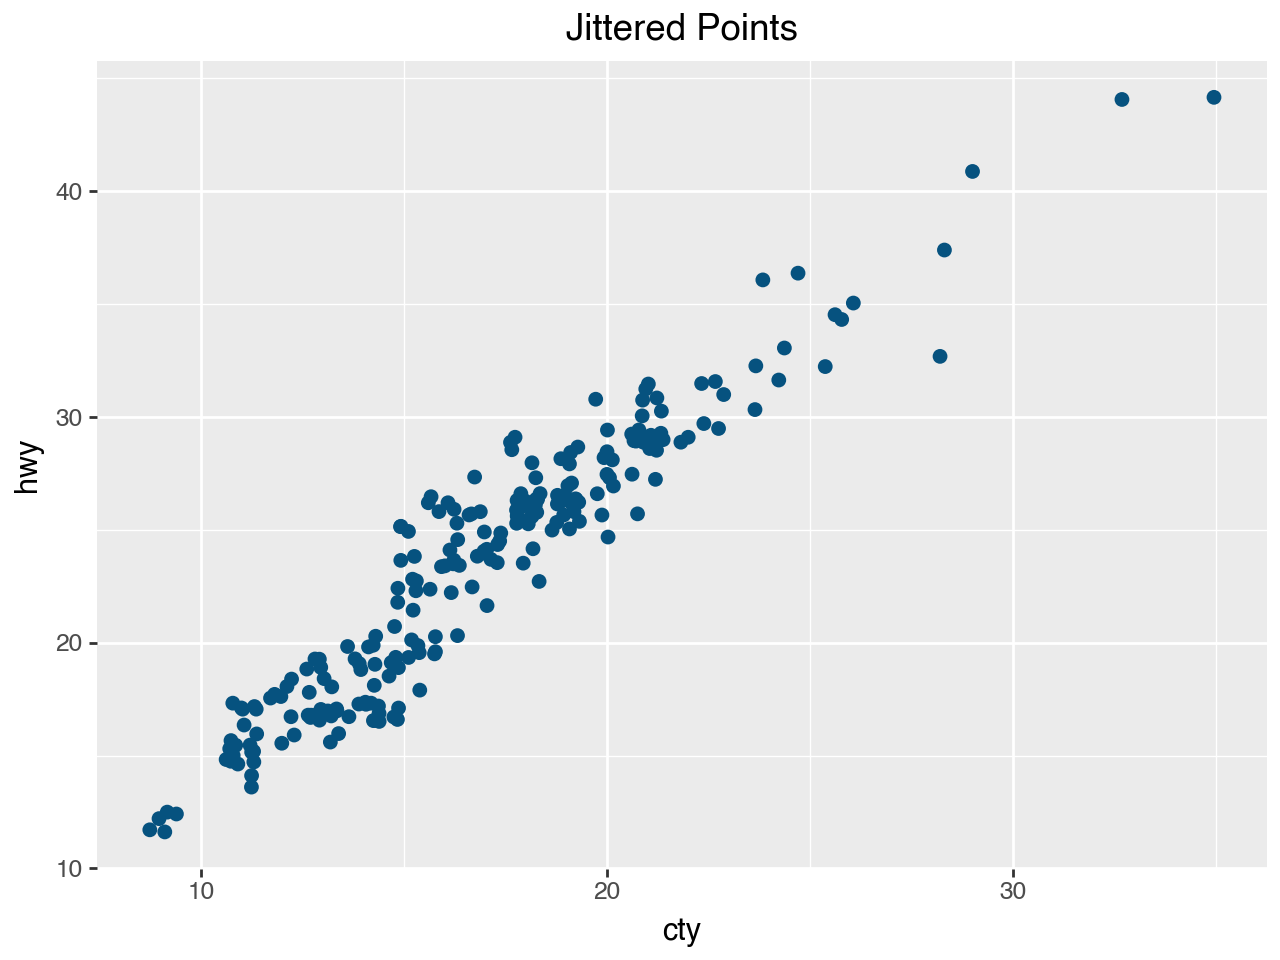

In [4]:
g = ggplot(mpg, aes(x="cty", y="hwy"))

(
    g
    + geom_jitter(height=0.5, size=2, color="#06527f")
    + labs(title="Jittered Points")
    + theme(plot_title=element_text(hjust=0.5))
)

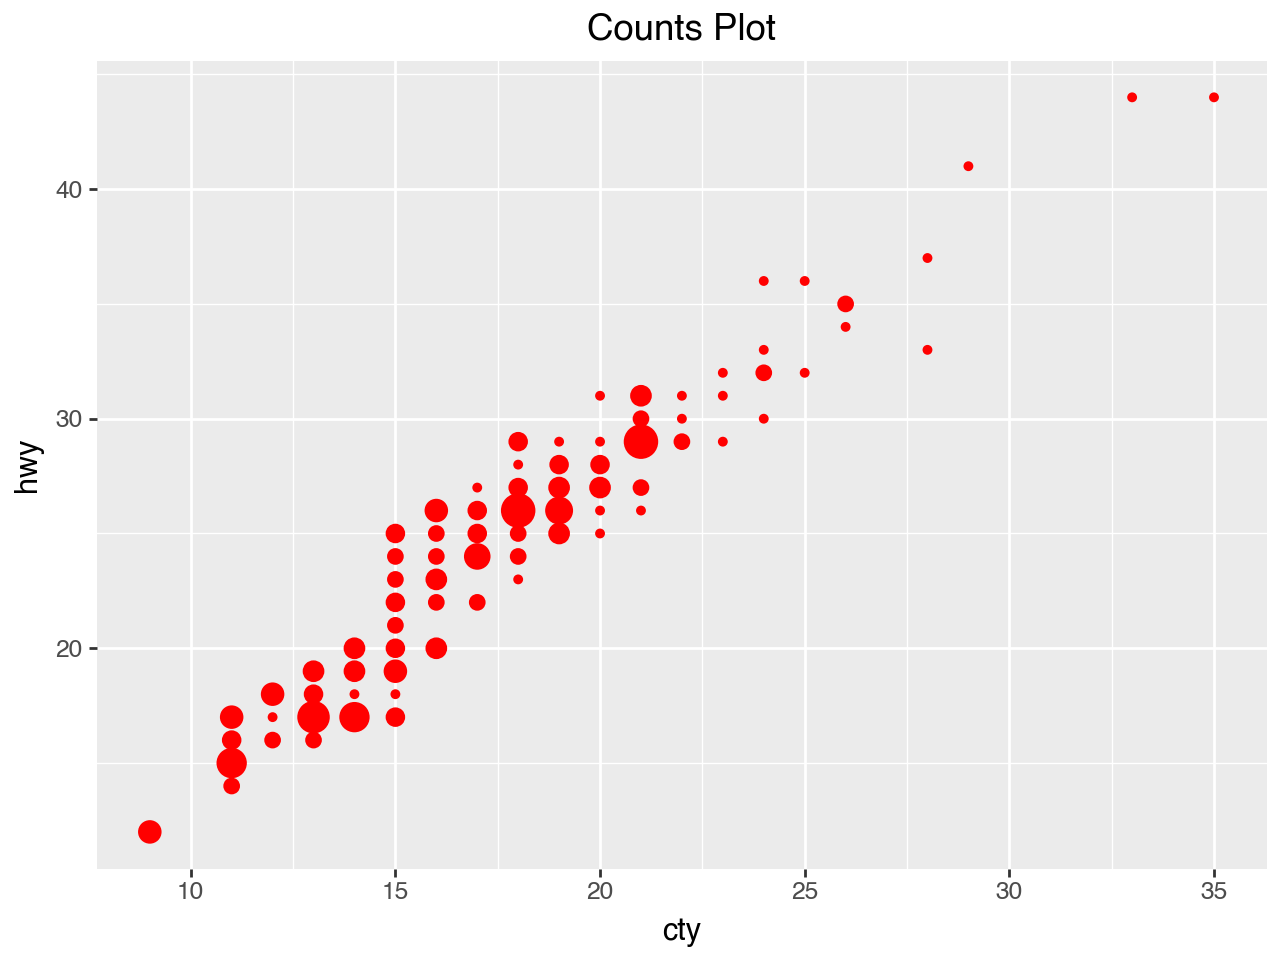

In [5]:
(
    g
    + geom_count(color="red")
    + labs(title="Counts Plot")
    + theme(plot_title=element_text(hjust=0.5), legend_position="none")
)

## FacetGrid

In [6]:
mtcars = pd.read_csv("data/mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout


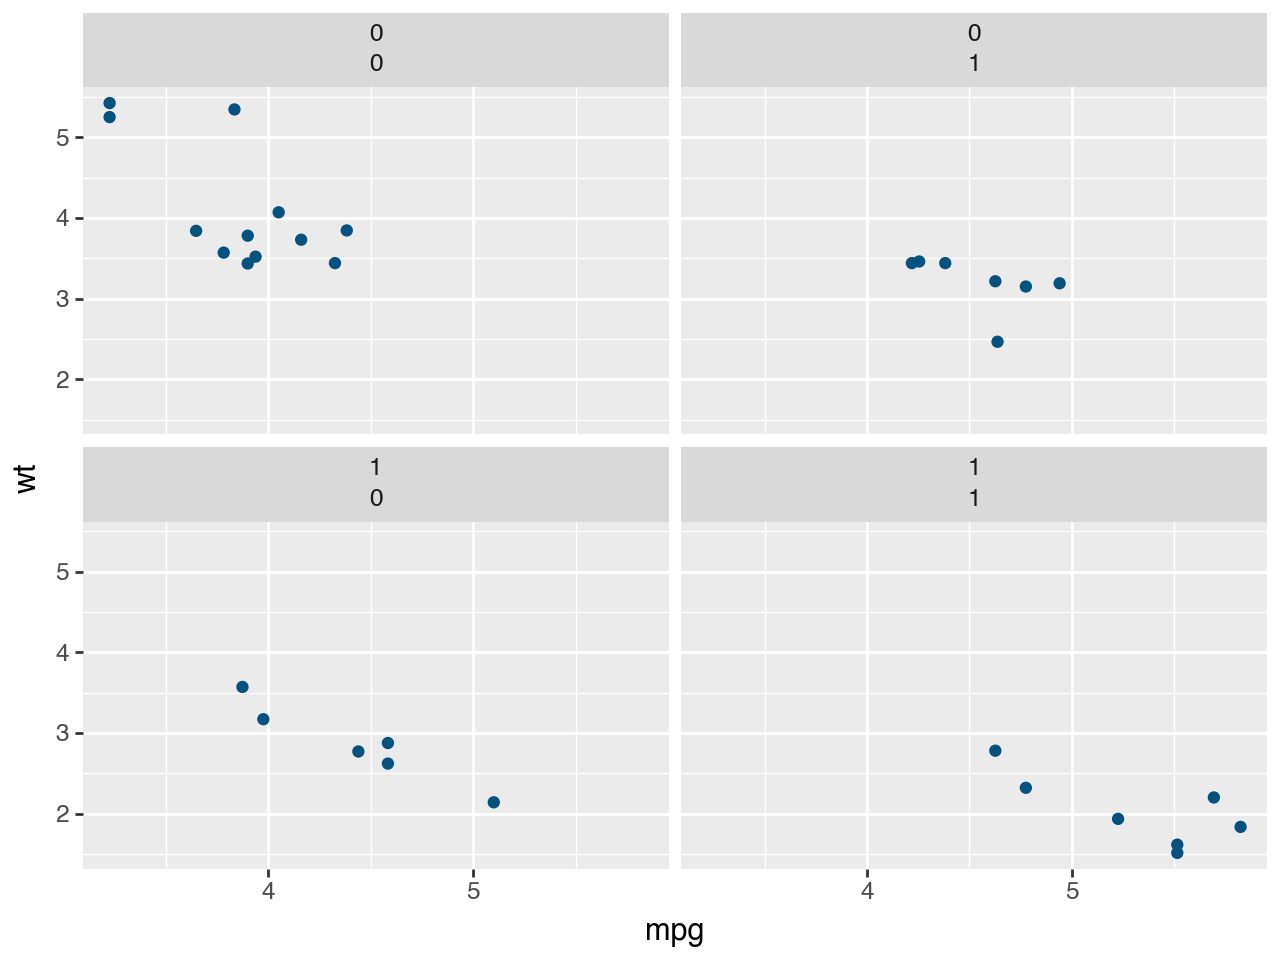

In [7]:
(
    ggplot(mtcars, aes("mpg", "wt"))
    + geom_point(color="#06527f")
    + facet_wrap(["am", "vs"])
)

## Heatmap


In [8]:
corr_matrix = mtcars.corr(numeric_only=True)
corr_matrix.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
mpg,1.000000,-0.858539,-0.867536,-0.787309,0.680312,-0.883453,0.420317,0.669260,0.593153,0.487226,-0.553703,0.730748
cyl,-0.858539,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988,-0.695182
disp,-0.867536,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977,-0.732073
hp,-0.787309,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812,-0.751422
drat,0.680312,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790,0.400430


In [9]:
corr_matrix2 = (
    corr_matrix.reset_index()
    .melt(id_vars="index")
    .sort_values("value", ascending=False)
)
corr_matrix2.head()

,index,variable,value
0,mpg,mpg,1.0
13,cyl,cyl,1.0
130,carb,carb,1.0
117,gear,gear,1.0
104,am,am,1.0


In [10]:
sort_seq = corr_matrix2.variable.unique()

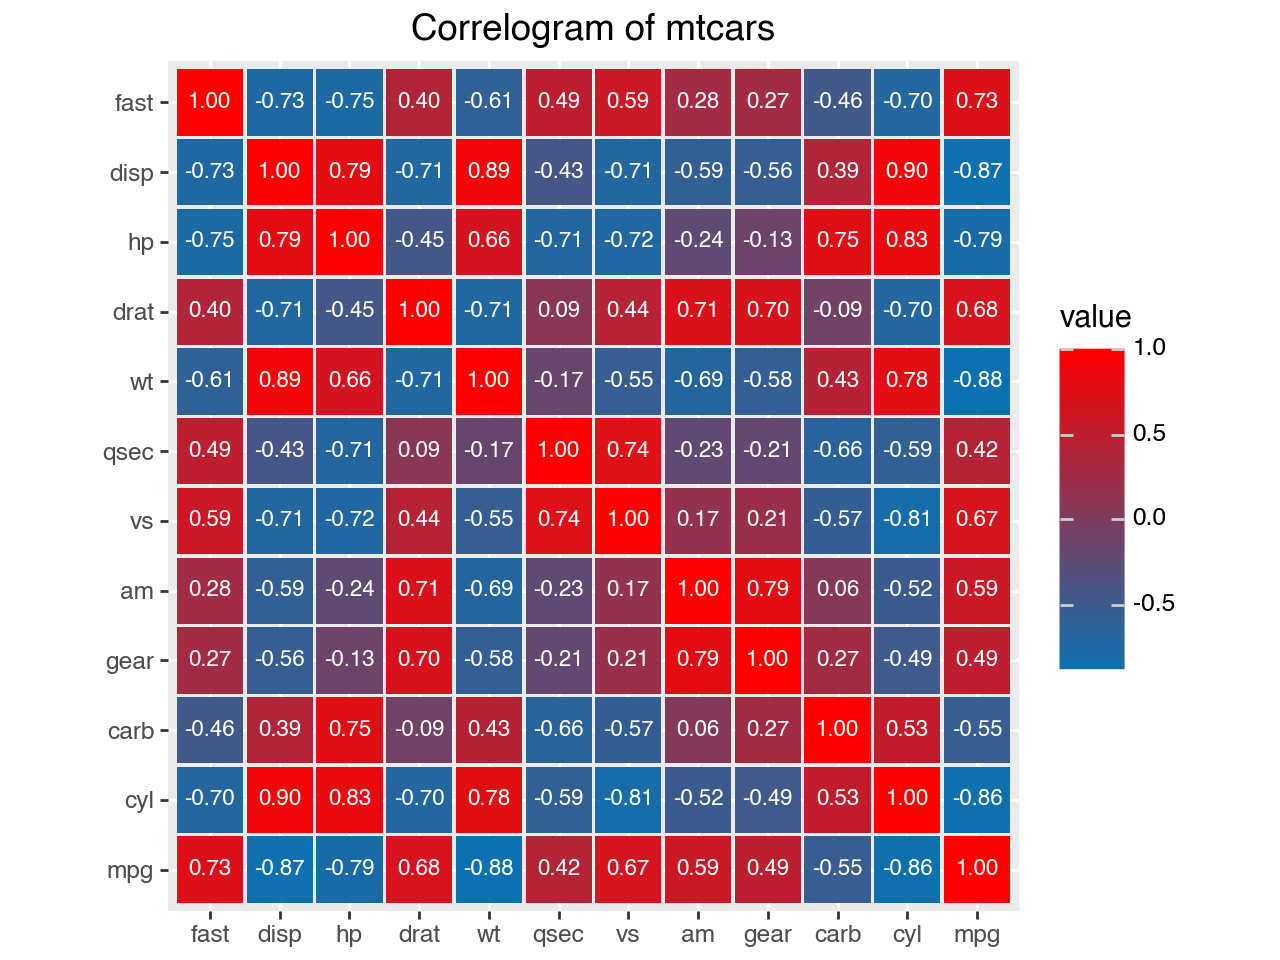

In [11]:
(
    ggplot(corr_matrix2, aes("index", "variable", fill="value"))
    + geom_tile(aes(width=0.95, height=0.95))
    + scale_fill_gradient(low="#0c71b0", high="#ff0000")
    + geom_text(aes(label="value"), size=8, format_string="{:.2f}", color="white")
    + labs(title="Correlogram of mtcars", x="", y="")
    + scale_x_discrete(limits=sort_seq[::-1])
    + scale_y_discrete(limits=sort_seq)
    + coord_fixed()
)

## Marginal Plot


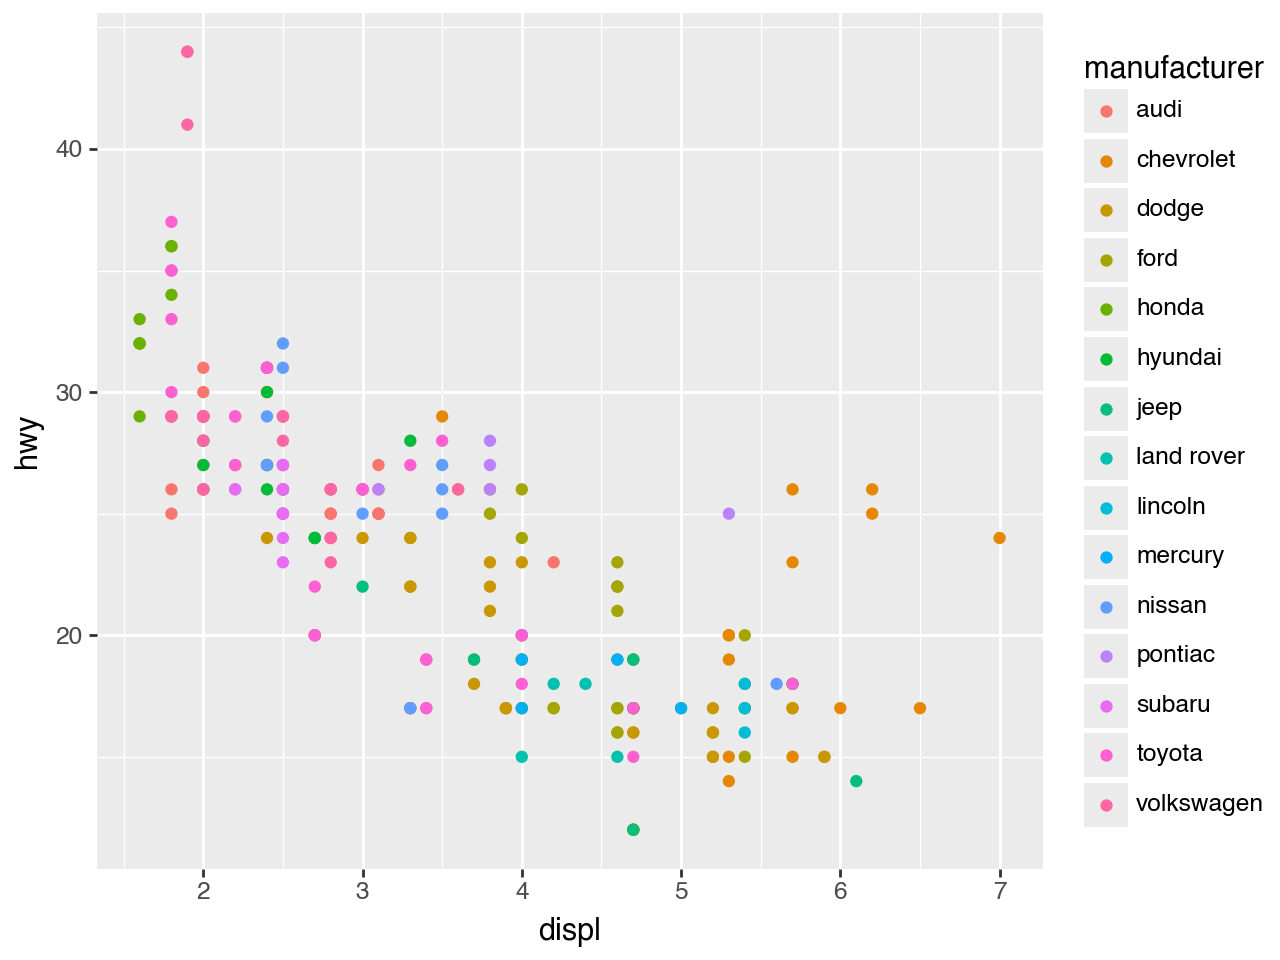

In [12]:
g1 = ggplot(mpg) + geom_point(aes("displ", "hwy", color="manufacturer"))
g2 = ggplot(mpg) + geom_boxplot(aes("displ", "hwy"))
g3 = ggplot(mpg) + geom_boxplot(aes("hwy", "displ")) + coord_flip()
g1